# ICLR dataset: embedding figures

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import pickle

In [2]:
# Load the data

iclr = pd.read_parquet('../data/iclr24v2a.parquet')

genders = pd.read_parquet('../results/variables/iclr24v2a/names_and_genders.parquet')

Z = np.load('../results/variables/iclr24v2a/embeddings_sbert/tsne_av.npy')
Z_openai = np.load('../results/variables/iclr24v2a/embeddings_openai/tsne_av.npy')
Z_tfidf = np.load('../results/variables/iclr24v2a/tsne_L2_svd.npy')

# Flip the TF-IDF embedding to align it better with the SBERT one
tmp = Z_tfidf.copy()
Z_tfidf[:, 0] = tmp[:, 1]
Z_tfidf[:, 1] = tmp[:, 0]

# Flip the openAI embedding to align it better with the SBERT one
tmp = Z_openai.copy()
Z_openai[:, 0] = tmp[:, 1]
Z_openai[:, 1] = tmp[:, 0]

colors = np.load('../results/variables/iclr24v2a/colors_iclr.npy')

label2color = pickle.load(open('../results/variables/iclr24v2a/dict_label_to_color.pkl', 'rb'))

In [3]:
label2abbr = {
    'optimization': 'optim',
    'transfer learning': 'transfer',
    'LLMs': 'LLM',
    'language models': 'lang',
    'semi-supervised learning': 'semi-sup',
    'RL': 'RL',
    'RNNs': 'RNN',
    'meta learning': 'meta',
    'imitation learning': 'imitation',
    'transformers': 'transf',
    'CNNs': 'CNN',
    'adversarial': 'adv',
    'GANs': 'GAN',
    'compression': 'compress',
    'autoencoders': 'AE',
    'graphs': 'graphs',
    'clustering': 'cluster',
    'few-shot learning': 'few-shot',
    'object detection': 'obj det',
    'continual learning': 'continual',
    'interpretability': 'interp',
    'multi-task learning': 'multi-task',
    'time series': 'time series',
    'active learning': 'active',
    'multi-agent RL': 'multi-ag RL',
    'optimal transport': 'OT',
    'privacy': 'privacy',
    'pruning': 'pruning',
    'neural architecture search': 'architect',
    'fairness': 'fair',
    'robustness': 'robust',
    'out-of-distribution': 'OOD',
    'causality': 'causal',
    'model-based RL': 'model-b RL',
    'diffusion models': 'diffusion',
    'anomaly detection': 'anomaly',
    'self-supervised learning': 'SSL',
    'federated learning': 'federated',
    'explainability': 'explain',
    'knowledge distillation': 'distill',
    'contrastive learning': 'contrastive',
    'offline RL': 'offline',
    'vision-language models': 'vis-lang',
    'ViTs': 'ViT',
    'llms': 'LLM',
    'in-context learning': 'in-context'
}

<IPython.core.display.Javascript object>


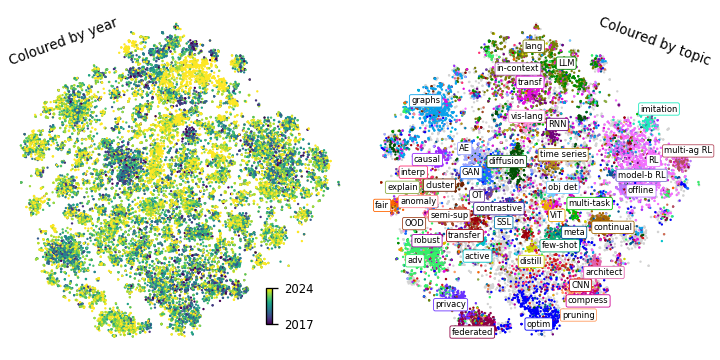

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.0), layout="constrained")

axs[0].axis("equal")
np.random.seed(42)
reorder = np.random.permutation(Z.shape[0])
sc = axs[0].scatter(
    Z[reorder, 0], Z[reorder, 1], s=2, c=iclr.year[reorder], ec="none", rasterized=True
)
axs[0].axis("off")

axclb = plt.axes([0.37, 0.1, 0.008, 0.1])
cb = fig.colorbar(sc, cax=axclb, ticks=[2017, 2024])
cb.ax.tick_params(labelsize=7)

axs[1].axis("equal")
axs[1].scatter(
    Z[iclr.labels == "unlabeled", 0],
    Z[iclr.labels == "unlabeled", 1],
    s=2,
    c=label2color["unlabeled"],
    ec="none",
    rasterized=True,
)
axs[1].axis("off")

ind = iclr.labels != "unlabeled"
reorder = np.random.permutation(np.sum(ind))
axs[1].scatter(
    Z[ind, 0][reorder],
    Z[ind, 1][reorder],
    s=2,
    ec="none",
    c=[label2color[c] for c in iclr.labels.values[ind][reorder]],
    rasterized=True,
)

from sklearn.neighbors import KernelDensity

for label in np.unique(iclr.labels.values):
    if label == "unlabeled":
        continue

    ind = label == iclr.labels.values
    if np.sum(ind) > 500:
        bw = 10
    else:
        bw = 2
    kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(Z[ind])
    log_density = kde.score_samples(Z[ind])
    mode = Z[ind][np.argmax(log_density)]
    mode += mode / np.linalg.norm(mode) * 7
    if label2abbr[label] == "imitation":
        mode[1] += 5
    if label2abbr[label] == "multi-ag RL":
        mode[1] += 5
        mode[0] -= 3
    if label2abbr[label] == "in-context":
        mode[0] -= 15
    if label2abbr[label] == "multi-task":
        mode[0] += 2
        mode[1] += 10
    if label2abbr[label] == "cluster":
        mode[0] -= 5
    if label2abbr[label] == "meta":
        mode[1] += 6
    if label2abbr[label] == "obj det":
        mode[1] += 5
    if label2abbr[label] == "privacy":
        mode[1] += 2
    if label2abbr[label] == "pruning":
        mode[1] -= 7
    if label2abbr[label] == "CNN":
        mode[1] += 5
    if label2abbr[label] == "OOD":
        mode[0] -= 10
    if label2abbr[label] == "transfer":
        mode[1] -= 5
    if label2abbr[label] == "anomaly":
        mode[1] += 8
    if label2abbr[label] == "contrastive":
        mode[1] += 3
    if label2abbr[label] == "active":
        mode[1] -= 3
        mode[0] += 2
    if label2abbr[label] == "interp":
        mode[1] += 7
        mode[0] -= 3
    if label2abbr[label] == "explain":
        mode[1] -= 1
        mode[0] -= 5
    axs[1].text(
        mode[0],
        mode[1],
        label2abbr[label],
        ha="center",
        va="center",
        c="k",
        fontsize=5,
        bbox=dict(
            facecolor="w",
            alpha=1,
            edgecolor=label2color[label],
            boxstyle="round, pad=.2",
            linewidth=0.5,
        ),
    )

fig.text(0.01, 0.82, "Coloured by year", fontsize=8, rotation=20)
fig.text(0.99, 0.82, "Coloured by topic", fontsize=8, rotation=-20, ha="right")

fig.savefig('../results/figures/final_figures/embedding.png', dpi=400)
fig.savefig('../results/figures/final_figures/embedding.pdf', dpi=400)

In [5]:
# plt.figure(figsize=(5,5))
# plt.scatter(*Z.T, s=1)
            
# box = [30, 40, 72, 85]
# ind = (Z[:,0] >= box[0]) & (Z[:,0] <= box[1]) & (Z[:,1] >= box[2]) & (Z[:,1] <= box[3])

# plt.plot([box[0], box[1]], [box[2], box[2]], 'k')
# plt.plot([box[0], box[1]], [box[3], box[3]], 'k')
# plt.plot([box[0], box[0]], [box[2], box[3]], 'k')
# plt.plot([box[1], box[1]], [box[2], box[3]], 'k')

# iclr[ind].title.values

<IPython.core.display.Javascript object>


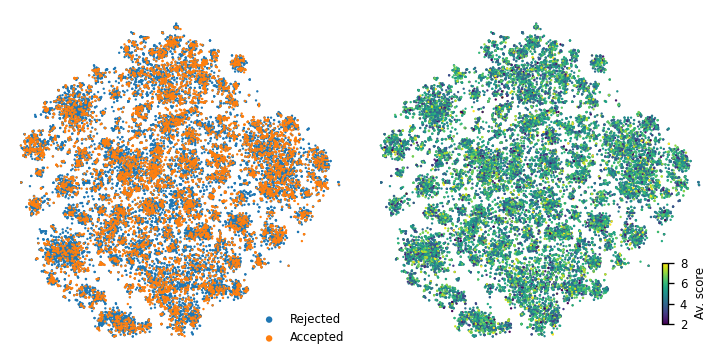

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.0), layout='constrained')

accepted = np.array([d[:3]=='Acc' for d in iclr.decision])
rejected = ~accepted # & (iclr.year < 2024)

avScore = np.array([np.mean(sc) if len(sc) > 0 else np.nan for sc in iclr.scores])

axs[0].axis('equal')
axs[0].scatter(*Z[rejected].T, s=2, ec='none', label='Rejected', rasterized=True)
axs[0].scatter(*Z[accepted].T, s=2, ec='none', label='Accepted', rasterized=True)
lgnd = axs[0].legend(frameon=False, fontsize=7, loc='lower right')

# np.random.seed(42)
# r  = np.random.permutation(np.sum(iclr.year < 2024))
# col = np.array(['#000000'] * len(iclr))
# col = np.zeros(len(iclr))
# cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
# col[accepted] = cols[1]
# col[rejected] = cols[0]
# sc = axs[0].scatter(*Z[iclr.year < 2024][r].T, s=2, ec='none', rasterized=True, 
#                     c=col[iclr.year < 2024][r])

# lgnd = axs[0].legend(*sc.legend_elements(), frameon=False, fontsize=7, loc='lower right')

for handle in lgnd.legendHandles:
    handle.set_sizes([15])

axs[0].axis('off')

axs[1].axis('equal')

np.random.seed(42)
r  = np.random.permutation(Z.shape[0])
sc = axs[1].scatter(*Z[r].T, c=avScore, s=2, ec='none', vmax=8, vmin=2, rasterized=True)

axclb = plt.axes([.92, .1, .008, .17])
cb = fig.colorbar(sc, cax=axclb, ticks=[2, 4, 6, 8])
cb.ax.tick_params(labelsize=7)
cb.set_label(label='Av. score', fontsize=7)

axs[1].axis('off')

fig.savefig('../results/figures/final_figures/acceptance-scores.png', dpi=200)
fig.savefig('../results/figures/final_figures/acceptance-scores.pdf', dpi=200)

<IPython.core.display.Javascript object>


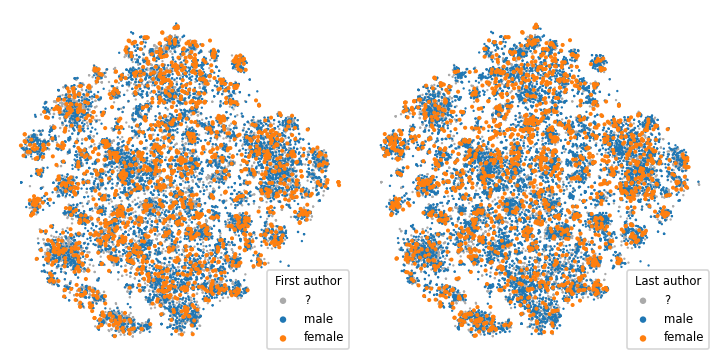

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.0), layout='constrained')

which = ['First', 'Last']
for num, genders in enumerate(genders[['first_author_gender', 'last_author_gender']].values.T):
    axs[num].axis('equal')
    axs[num].scatter(*Z[(iclr.year < 2024) & (genders=='None')].T, s=2, 
                     c='#aaaaaa', ec='none', label='?', rasterized=True)
    axs[num].scatter(*Z[genders=='male'].T, s=2, ec='none', 
                     label='male', rasterized=True)
    axs[num].scatter(*Z[genders=='female'].T, s=6, ec='none', 
                     label='female', rasterized=True)

#     axs[num].scatter(*Z[(genders=='female') | (genders=='male')].T, s=2, ec='none', 
#                      c=genders[(genders=='female') | (genders=='male')]=='male', rasterized=True)

    lgnd = axs[num].legend(title=f'{which[num]} author', loc='lower right', fontsize=7)
    lgnd.get_title().set_fontsize('7')
    for handle in lgnd.legendHandles:
        handle.set_sizes([15])

    axs[num].axis('off')

fig.savefig('../results/figures/final_figures/genders.png', dpi=200)
fig.savefig('../results/figures/final_figures/genders.pdf', dpi=200)

<IPython.core.display.Javascript object>


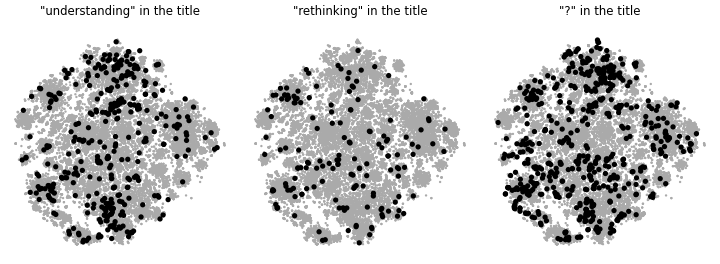

366
155
550


In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(6.0, 2.2), layout='constrained')

words = ['understanding', 'rethinking', '?']

for num, word in enumerate(words):
    mask = np.array([word in d.lower() for d in iclr.title])
    print(np.sum(mask))

    axs[num].axis('equal')
    axs[num].scatter(Z[~mask,0], Z[~mask,1], s=2,  ec='none', c='#aaaaaa', rasterized=True)
    axs[num].scatter(Z[mask,0], Z[mask,1],   s=10, ec='none', c='k')
    axs[num].set_title(f'"{word}" in the title', fontsize=7)
    axs[num].axis('off')

fig.savefig('../results/figures/final_figures/understanding.png', dpi=200)
fig.savefig('../results/figures/final_figures/understanding.pdf', dpi=200)

<IPython.core.display.Javascript object>


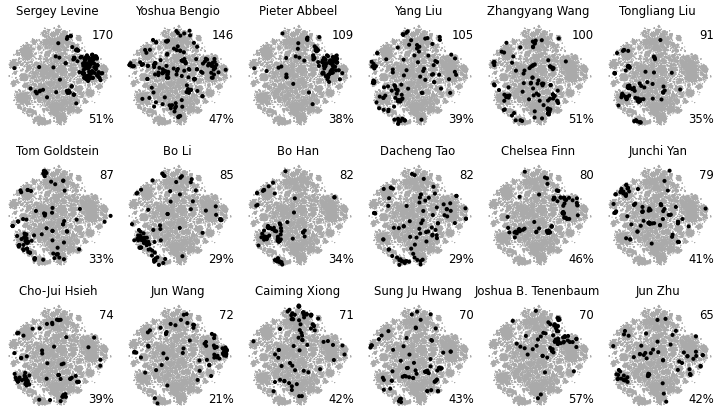

In [9]:
all_authors = ', '.join(list(iclr.authors)).split(', ')
authors, counts = np.unique(all_authors, return_counts=True)

ind = np.argsort(counts)[::-1]
# for i in ind[:10]:
#     print(f'{authors[i]:20} {counts[i]}')
top_authors = authors[ind]

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(6.0, 3.5), layout='constrained')

for num, author in enumerate(top_authors[:18]):
    mask = [author in a.split(', ') for a in iclr.authors]
    
    axs.flat[num].axis('equal')
    axs.flat[num].scatter(*Z.T, s=.5, ec='none', c='#aaaaaa', rasterized=True)
    axs.flat[num].scatter(*Z[mask].T, s=6, ec='none', c='k', zorder=2)

    axs.flat[num].axis('off')
    axs.flat[num].set_title(f'{author}', fontsize=7, y=.92, x=.48)
    axs.flat[num].text(.99, .8, f'{np.sum(mask)}', ha='right', transform=axs.flat[num].transAxes, fontsize=7)
    
    accepted = np.array([d[:6]=='Accept' for d in iclr.decision])
    acceptance_rate = np.nanmean(accepted[mask]) * 100
    axs.flat[num].text(.99, .1, f'{acceptance_rate:.0f}%', fontsize=7, 
                       ha='right', transform=axs.flat[num].transAxes)

fig.savefig('../results/figures/final_figures/authors.png', dpi=200)
fig.savefig('../results/figures/final_figures/authors.pdf', dpi=200)

<IPython.core.display.Javascript object>


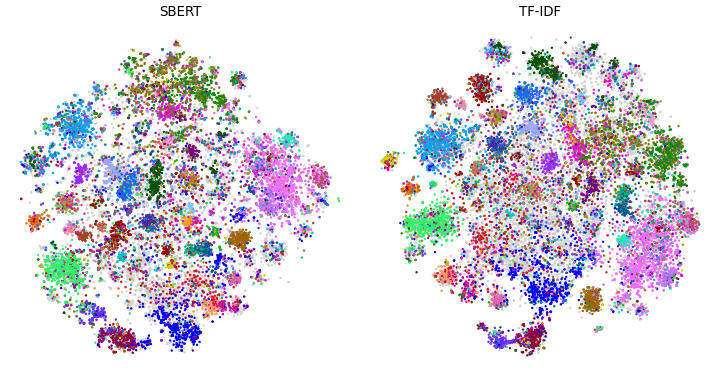

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.1), layout='constrained')

titles = ['SBERT', 'TF-IDF']

for num, E in enumerate([Z, Z_tfidf]):
    axs.flat[num].axis('equal')
    axs.flat[num].scatter(E[iclr.labels=='unlabeled', 0], E[iclr.labels=='unlabeled', 1], s=2, 
                     c=label2color['unlabeled'], ec='none', rasterized=True)
    axs.flat[num].axis('off')

    ind = iclr.labels != 'unlabeled'
    np.random.seed(42)
    reorder = np.random.permutation(np.sum(ind))
    axs.flat[num].scatter(E[ind, 0][reorder], E[ind, 1][reorder], s=2, ec='none', 
                     c=[label2color[c] for c in iclr.labels.values[ind][reorder]], rasterized=True)
    
    axs.flat[num].set_title(titles[num], fontsize=8)

fig.savefig('../results/figures/final_figures/tfidf.png', dpi=300)
fig.savefig('../results/figures/final_figures/tfidf.pdf', dpi=300)

<IPython.core.display.Javascript object>


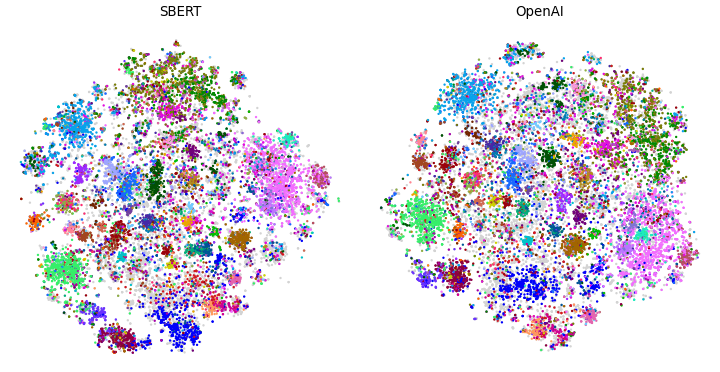

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.1), layout='constrained')

titles = ['SBERT', 'OpenAI']

for num, E in enumerate([Z, Z_openai]):
    axs.flat[num].axis('equal')
    axs.flat[num].scatter(E[iclr.labels=='unlabeled', 0], E[iclr.labels=='unlabeled', 1], s=2, 
                     c=label2color['unlabeled'], ec='none', rasterized=True)
    axs.flat[num].axis('off')

    ind = iclr.labels != 'unlabeled'
    np.random.seed(42)
    reorder = np.random.permutation(np.sum(ind))
    axs.flat[num].scatter(E[ind, 0][reorder], E[ind, 1][reorder], s=2, ec='none', 
                     c=[label2color[c] for c in iclr.labels.values[ind][reorder]], rasterized=True)
    
    axs.flat[num].set_title(titles[num], fontsize=8)

fig.savefig('../results/figures/final_figures/openai.png', dpi=300)
fig.savefig('../results/figures/final_figures/openai.pdf', dpi=300)